# Lab08 - Neural Networks and Deep Learning
Author: [Yunting Chiu](https://www.linkedin.com/in/yuntingchiu/) 

# Install the required packages

In [114]:
import matplotlib.pyplot as plt
import math
import numpy as np
import sys
import os
import random
from sklearn import mixture
from sklearn.model_selection import train_test_split
import pandas as pd

# a
Generate and plot a data set $X_1$ (training set) containing 100 points from $w_1$ (50 points from each associated Guassian) and 150 points from $w_2$ (again 50 points from each associated Gaussian). In the same way, generate an additional set $X_2$ (test set).


In [109]:
random.seed(1234)
# cov = var * identity matrix
# var = 1
# w1
w11 = np.random.multivariate_normal(mean = [-5, 5], cov = [[1, 0], [0, 1]], size = 50) 
w12 = np.random.multivariate_normal(mean = [5, -5], cov = [[1, 0], [0, 1]], size = 50)

# w2
w21 = np.random.multivariate_normal(mean = [-5, -5], cov = [[1, 0], [0, 1]], size = 50)
w22 = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]], size = 50)
w23 = np.random.multivariate_normal(mean = [5, 5], cov = [[1, 0], [0, 1]], size = 50)

In [ ]:
# label the data point, w1 = +1, w2 = -1
w1 = np.vstack((w11, w12))
x_w1, y_w1 = w1, np.ones((len(w1), 1))

w2 = np.vstack((w21, w22, w23))
x_w2, y_w2 = w2, np.zeros((len(w2), 1))
for i in range(len(y_w2)):
  if y_w2[i] == 0:
    y_w2[i] = -1


W1 = np.concatenate((x_w1, y_w1), axis=1)
W2 = np.concatenate((x_w2, y_w2), axis=1)


# data = 100 from w1, 150 from w2 as X1, 100 from w1, 150 from w2 as X2, so X1 + X2 = 500 observations
data = np.vstack((W1, W2, W1, W2))
print(data.shape)
#print(data[:, 2:])

## split 80 % of $X$ to $X_1$ (training set) and 20 % of $X_2$ (testing set)
Based on the question, the traing and testing sets seem have the same number of observations.

In [124]:
X_train, X_test, y_train, y_test = train_test_split(data[:, 0:2], data[:, 2:], test_size= 0.2, random_state=4) # 80% for training, 20 for of testing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400, 1)
(100, 1)


## Plots

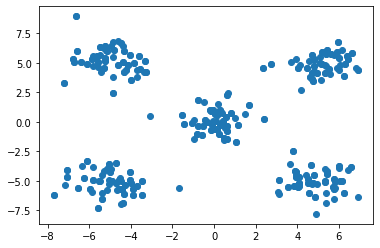

In [125]:
plt.scatter(X_train[:, 0], X_train[:, 1])

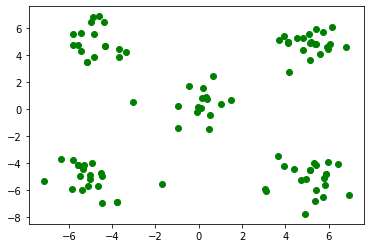

In [126]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = 'green')

# B
Based on the training set $X_1$, train a two-layer neural network with two nodes in the hidden layer, each one having the rectified linear activation function or ReLU and a single output node with linear activation function using the standard backpropagation algorithm for 6000 iterations and step size equal to 0.01. Compute the training and test errors, based on $X_1$ and $X_2$ respectively. Also, plot the test points as well as the decision lines formed by the network.

In [9]:
"""
random.seed(4321)
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
 
network = initialize_network(2, 1, 2)
for layer in network:
	print(layer)
initialize_network(2, 2, 2)
"""

"\nrandom.seed(4321)\n# Initialize a network\ndef initialize_network(n_inputs, n_hidden, n_outputs):\n\tnetwork = list()\n\thidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]\n\tnetwork.append(hidden_layer)\n\toutput_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]\n\tnetwork.append(output_layer)\n\treturn network\n \nnetwork = initialize_network(2, 1, 2)\nfor layer in network:\n\tprint(layer)\ninitialize_network(2, 2, 2)\n"

In [12]:
random.seed(4321)
iter = 6000
lr = 0.01 # learning rate
par_vec=[lr, 0, 0, 0, 0]


In [29]:
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random.random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random.random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network
network = initialize_network(2, 2, 2)
for layer in network:
	print(layer)

[{'weights': [0.9427720817090225, 0.434143777531954, 0.916276731869992]}, {'weights': [0.4501690790559013, 0.11392323323954556, 0.15407141624313714]}]
[{'weights': [0.23425628803308196, 0.8550957638620171, 0.26276239741647966]}, {'weights': [0.5886809649004217, 0.8175008759708524, 0.5613816852689439]}]


In [61]:
from math import exp
from random import seed
from random import random

# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

# Calculate neuron activation for an input
def activate(weights, inputs):
	activation = weights[-1]
	for i in range(len(weights)-1):
		activation += weights[i] * inputs[i]
	return activation

# Transfer neuron activation
def transfer(activation):
	return 1.0 / (1.0 + exp(-activation))

# Forward propagate input to a network output
def forward_propagate(network, row):
	inputs = row
	for layer in network:
		new_inputs = []
		for neuron in layer:
			activation = activate(neuron['weights'], inputs)
			neuron['output'] = transfer(activation)
			new_inputs.append(neuron['output'])
		inputs = new_inputs
	return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
	return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
	for i in reversed(range(len(network))):
		layer = network[i]
		errors = list()
		if i != len(network)-1:
			for j in range(len(layer)):
				error = 0.0
				for neuron in network[i + 1]:
					error += (neuron['weights'][j] * neuron['delta'])
				errors.append(error)
		else:
			for j in range(len(layer)):
				neuron = layer[j]
				errors.append(neuron['output'] - expected[j])
		for j in range(len(layer)):
			neuron = layer[j]
			neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

# Update network weights with error
def update_weights(network, row, l_rate):
	for i in range(len(network)):
		inputs = row[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j] -= l_rate * neuron['delta'] * inputs[j]
			neuron['weights'][-1] -= l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			outputs = forward_propagate(network, row)
			expected = [0 for i in range(n_outputs)]
			expected[row[-1]] = 1
			sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
			backward_propagate_error(network, expected)
			update_weights(network, row, l_rate)
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

# Test training backprop algorithm
seed(1)
"""
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
"""
dataset = X1
n_inputs =2
n_outputs = 2
network = initialize_network(n_inputs, 2, n_outputs)
train_network(network, dataset, 0.01, 6000, n_outputs)
for layer in network:
	print(layer)


TypeError: ignored

In [22]:
import numpy as np

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2


class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            if k % 10000 == 0: 
              print('epochs:', k)
            
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x): 
      a = np.concatenate((np.ones(1).T, np.array(x)), axis=1)      
      for l in range(0, len(self.weights)):
        a = self.activation(np.dot(a, self.weights[l]))
      return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])

    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000


AxisError: ignored

# References
- https://towardsdatascience.com/gaussian-mixture-models-with-python-36dabed6212a
- https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

# Output

In [ ]:
# should access the Google Drive files before running the chunk
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic 
!jupyter nbconvert --to pdf "/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/GitHub/Labs/07/submit/Lab8_Yunting.ipynb"